### 차원 축소
* 학습 데이터 크기를 줄여서 학습 시간 절약
* 불필요한 피처들을 줄여서 모델 성능 향상에 기여
* 다차원의 데이터를 3차원 이하의 차원 축소를 통해서 시각적으로 보다 쉽게 데이터 패턴 인지

피처 선택: 특정 피처에 종속성이 강한 불피요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택

피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것

#### 1. 공분산

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category= RuntimeWarning)

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [2]:
 y_target= df["body_shape"]
 X_train = df.drop(["body_shape"], axis=1)

In [3]:
from sklearn. preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

In [4]:
X_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

###### 1.1 Covariance Matrix of Features

In [5]:
import numpy as np

features = X_std.T
covarinace_matrix = np.cov(features)
covarinace_matrix


array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

######  1.2 고유벡터 와 고윳값 with 공분산 행렬

In [6]:
eig_vals, eig_vecs = np.linalg.eig(covarinace_matrix)

In [7]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [8]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [9]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

###### 1.3 project data into selected

In [10]:

projected_x = X_std.dot(eig_vecs.T[0]) # T  transpose 행과 열을 바꿔주는 것이다.

In [11]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis']=0.0
result['label']= y_target


In [12]:
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


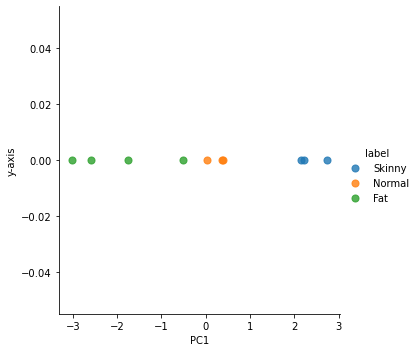

In [13]:
sns.lmplot('PC1', 'y-axis', data= result, scatter_kws={'s':50},hue='label', fit_reg=False)

##### SKlearn PCA 라이브러리 이용

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_pca = pca.fit_transform(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


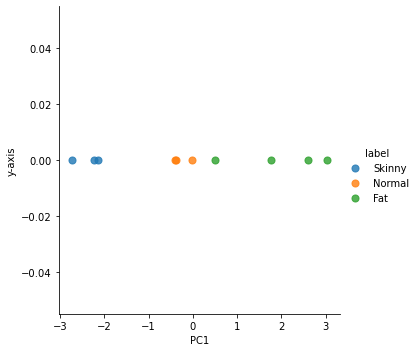

In [15]:
df_pca

result = pd.DataFrame(df_pca, columns=['PC1'])
result['y-axis']=0.0
result['label']= y_target

sns.lmplot('PC1', 'y-axis', data= result, scatter_kws={'s':50},hue='label', fit_reg=False)

In [16]:
#### 붓꽃 데이터로 해보기 pca 2로 해보기

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn. preprocessing import StandardScaler

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target


In [18]:

iris_scaled = StandardScaler().fit_transform(irisDF)

In [19]:
pca  = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

pca_columns = ['pca_component_1', 'pca_componenet_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target']=iris.target



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)


X_train, X_test, y_train, y_test = train_test_split(irisDF_pca, irisDF_pca, random_state=156)
scores_origin = cross_val_score(rcf, iris.data, iris.target,scoring = 'accuracy', cv =3)
scores = cross_val_score(rcf, irisDF_pca, iris.target, scoring = 'accuracy', cv =3)




print(scores_origin)
print(scores)

[0.98 0.94 0.96]
[0.98 1.   1.  ]


In [97]:
card_df = pd.read_csv("../datasets/UCI_Credit_Card.csv")

In [81]:
card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [98]:
card_df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'default'}, inplace = True)

# 속성과 클래스로 데이터 분류
y_target = card_df['default']
X_features = card_df.drop('default', axis=1)

y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:>

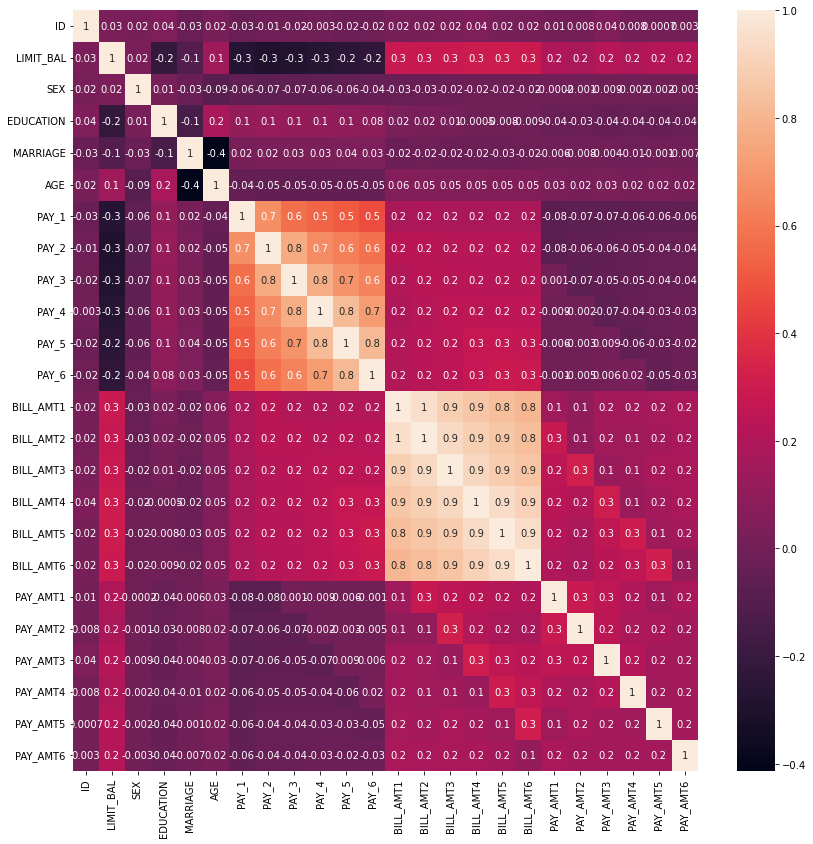

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [65]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_varinace_ratio_ 계산 위해 fit()호출
scaler = StandardScaler()
df_credit_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_credit_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

# 6개의 피처를 2개의 피처로 PCA 변환 했을때 첫번째 컴포넌트가 전체 변동성의 90%를 설명한다.


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)


# 원본 데이터일 때 랜덤 포레스트 예측 성능
scores_origin = cross_val_score(rcf, X_features, y_target,scoring = 'accuracy', cv =3)

print('CV =3 인 경우의 개별 Fold 세트별 정확도', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))


CV =3 인 경우의 개별 Fold 세트별 정확도 [0.98 1.   1.  ]
평균 정확도: 0.9933


In [38]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)

scaler = StandardScaler()
df_credit_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_credit_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring = 'accuracy', cv=3)

print('CV =3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도', scores)
print('PCA 변환 데이터 셋 평균 정확도 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))


CV =3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도 [0.98 1.   1.  ]
PCA 변환 데이터 셋 평균 정확도 평균 정확도: 0.7936


In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)
cols_pay = ['PAY_'+str(i) for i in range(1,7)]
print(cols_pay)

scaler = StandardScaler()
df_colsbill_scaled = scaler.fit_transform(X_features[cols_bill])
df_colspay_scaled = scaler.fit_transform(X_features[cols_pay])
pca = PCA(n_components=1)
pca.fit(df_colsbill_scaled)
pca.fit(df_colspay_scaled)
tr_colsbill=pca.transform(df_colsbill_scaled)
tr_colspay=pca.transform(df_colspay_scaled)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [100]:
card_df.drop(cols_bill,axis=1,inplace=True)
card_df.drop(cols_pay,axis=1,inplace=True)
card_df['bill_new']=tr_colsbill
card_df['pay_new']=tr_colspay
card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,bill_new,pay_new
0,1,20000.0,2,2,1,24,0.0,689.0,0.0,0.0,0.0,0.0,1,-1.608955,-0.477471
1,2,120000.0,2,2,2,26,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,-1.542260,1.461637
2,3,90000.0,2,2,2,34,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,-1.040650,0.393314
3,4,50000.0,2,2,1,37,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,-0.254850,0.393314
4,5,50000.0,1,2,1,57,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-0.952663,-0.273290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,2.547827,0.393314
29996,29997,150000.0,1,3,2,43,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-1.512925,-0.983642
29997,29998,30000.0,1,2,2,37,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,-1.180947,3.003066
29998,29999,80000.0,1,3,1,41,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.026376,0.015424


In [101]:
card_df1= card_df.drop('bill_new', axis=1)

In [102]:
card_df2= card_df.drop('pay_new', axis=1)

In [103]:
y_target = card_df['default']
X_features = card_df.drop('default', axis=1)

In [104]:
y_target1 = card_df1['default']
X_features1 = card_df1.drop('default', axis=1)
y_target2 = card_df2['default']
X_features2 = card_df2.drop('default', axis=1)

In [89]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv=3)
print('cv=3개인 경우의 개별 fold세트별 정확도:', scores)
print(f'평균 정확도:{np.mean(scores):.4f}')

cv=3개인 경우의 개별 fold세트별 정확도: [0.2268 0.8113 0.7788]
평균 정확도:0.6056


In [106]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scaler = StandardScaler()
df_credit_scaled = scaler.fit_transform(X_features1)

pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_credit_scaled)
scores = cross_val_score(rcf, X_features1, y_target1, scoring = 'accuracy', cv=3)
print('cv=3개인 경우의 개별 fold세트별 정확도:', scores)
print(f'평균 정확도:{np.mean(scores):.4f}')

cv=3개인 경우의 개별 fold세트별 정확도: [0.2279 0.8095 0.7788]
평균 정확도:0.6054


In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features2, y_target2, scoring = 'accuracy', cv=3)
print('cv=3개인 경우의 개별 fold세트별 정확도:', scores)
print(f'평균 정확도:{np.mean(scores):.4f}')